In [1]:
import matplotlib.pyplot as plt

import sys
sys.path.append('./src')
import warnings
warnings.filterwarnings("ignore")

from data import PPCI

In [2]:
dataset = PPCI(encoder = "dino",
               token = "class",
               task = "or",
               split_criteria = "position_easy",
               environment = "supervised",
               batch_size = 256,
               num_proc = 4,
               verbose = True,
               data_dir = 'data/istant_hq',
               results_dir = 'results/istant_hq')
#dataset.plot_out_distribution()
dataset.train(add_pred_env="supervised", 
              hidden_layers = 2,
              hidden_nodes = 256,
              batch_size = 256,
              lr = 0.0005,
              seed = 4,
              num_epochs=10,
              save = False,
              verbose=True)
# dataset.visualize(k=8, save=True)
# result_tr_y = dataset.evaluate(color="yellow", train=True, verbose=False)
# result_tr_b = dataset.evaluate(color="blue", train=True, verbose=False)
# result_val_y = dataset.evaluate(color="yellow", train=False, verbose=False)
# result_val_b = dataset.evaluate(color="blue", train=False, verbose=False)

Embeddings from encoder 'dino' token 'class' already extracted for the supervised environment.
Prediction-Powered Causal Inference dataset successfully loaded.
Device: cpu
Starting perfomances
  train:  Accuracy=0.244, Precision=0.218, Recall=0.934
  val:  Accuracy=0.294, Precision=0.237, Recall=0.898
Epoch 1
  Train: Loss=0.410
  train:  Accuracy=0.934, Precision=0.791, Recall=0.953
  val:  Accuracy=0.901, Precision=0.791, Recall=0.789
Epoch 2
  Train: Loss=0.238
  train:  Accuracy=0.959, Precision=0.866, Recall=0.962
  val:  Accuracy=0.890, Precision=0.800, Recall=0.712
Epoch 3
  Train: Loss=0.180
  train:  Accuracy=0.952, Precision=0.831, Recall=0.987
  val:  Accuracy=0.894, Precision=0.764, Recall=0.795
Epoch 4
  Train: Loss=0.154
  train:  Accuracy=0.975, Precision=0.927, Recall=0.961
  val:  Accuracy=0.893, Precision=0.853, Recall=0.660
Epoch 5
  Train: Loss=0.127
  train:  Accuracy=0.971, Precision=0.893, Recall=0.987
  val:  Accuracy=0.898, Precision=0.831, Recall=0.711
Epoch 6

In [3]:
dataset.evaluate()

{'loss_val': 0.7864980697631836,
 'acc_val': 0.8989999890327454,
 'bacc_val': 0.8598368763923645,
 'TEB_val': -0.006133407354354858,
 'acc': 0.9299052953720093,
 'bacc': 0.9311100244522095,
 'TEB': -0.0002903193235397339,
 'TEB_bin': 0.0035277903079986572,
 'EAD': 0.062312498688697815}

In [37]:
len(dataset.supervised["T"][dataset.supervised["split"]]==2)

9600

tensor([-1., -1.,  6.,  1.,  0.,  0.,  0.,  0.])
tensor(0.)


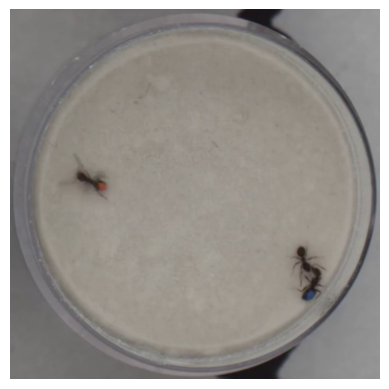

In [3]:
exp = 0
pos = 6
frame = 720

frame_id = ((dataset.supervised["source_data"]["experiment"] == exp) & (dataset.supervised["source_data"]["position"] == pos) & (dataset.supervised["source_data"]["frame"] == frame)).nonzero(as_tuple=True)[0][0].item()
img = dataset.supervised["source_data"][frame_id]["image"] # shape 3, 770, 770
print(dataset.supervised["W"][frame])
print(dataset.supervised["Y"][frame])
# remove ticks
plt.axis('off')
plt.imshow(img.permute(1, 2, 0));

tensor(0.)
tensor(1.)


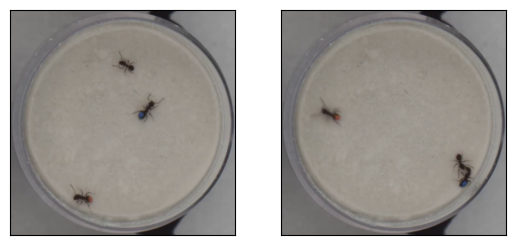

In [4]:
exp = 0
pos = 6
frame = 450

frame_id = ((dataset.supervised["source_data"]["experiment"] == exp) & (dataset.supervised["source_data"]["position"] == pos) & (dataset.supervised["source_data"]["frame"] == frame)).nonzero(as_tuple=True)[0][0].item()
img1 = dataset.supervised["source_data"][frame_id]["image"] # shape 3, 770, 770
print(dataset.supervised["Y"][frame_id])

exp = 0
pos = 6
frame = 720

frame_id = ((dataset.supervised["source_data"]["experiment"] == exp) & (dataset.supervised["source_data"]["position"] == pos) & (dataset.supervised["source_data"]["frame"] == frame)).nonzero(as_tuple=True)[0][0].item()
img2 = dataset.supervised["source_data"][frame_id]["image"] # shape 3, 770, 770
print(dataset.supervised["Y"][frame_id])

# plot the 2 images
fig, ax = plt.subplots(1, 2)
ax[0].imshow(img1.permute(1, 2, 0))
ax[1].imshow(img2.permute(1, 2, 0))
# remove ticks
for a in ax:
    a.set_xticks([])
    a.set_yticks([])
# attach the plot closer
plt.show()

In [5]:
dataset.evaluate(color="blue", verbose=False)

{'loss_val': 0.8476560711860657,
 'acc_val': 0.8870000243186951,
 'bacc_val': 0.9038461446762085,
 'TEB_val': -0.0501691997051239,
 'acc': 0.8959659337997437,
 'bacc': 0.9128807783126831,
 'TEB': -0.027264252305030823,
 'TEB_bin': -0.025701358914375305}

In [ ]:
from causal import compute_ate
compute_ate(dataset.supervised["Y_hat"], 
            dataset.supervised["T"], 
            dataset.supervised["W"], 
            method="ead", 
            color="blue")

In [ ]:
# dataset = PPCI()
# dataset.plot_out_distribution()
# dataset.train()
# dataset.visualize()
# dataset.evaluate()

## Post-Processing

In [ ]:
exp = (dataset.supervised["source_data"]["experiment"]==4)
pos = (dataset.supervised["source_data"]["position"]==1)
filter = (exp & pos).nonzero().squeeze()
y = dataset.supervised["Y"][filter][:,0].detach()
y_hat = dataset.supervised["Y_hat"][filter][:,0].detach()
y_pred = y_hat.round()

plt.scatter(range(len(filter)), y_hat, s=1, c="blue", alpha=0.5, label="y_probs")
plt.scatter(range(len(filter)),y_pred-(-1)**y_pred.detach()*0.04, s=1, c="red", alpha=0.5, label="y_pred")
plt.scatter(range(len(filter)), y-(-1)**y.detach()*0.02, s=1, c="green", alpha=0.5, label="y")
plt.legend()
plt.show()

In [ ]:
frame = (dataset.supervised["source_data"]["frame"]==2220)
idx = (exp & pos & frame).nonzero().item()
img = dataset.supervised["source_data"][idx]["image"]
outcome = dataset.supervised["source_data"][idx]["outcome"]

img = img.permute(1, 2, 0)
plt.title(f"Y2F: {int(outcome[0])}, B2F: {int(outcome[1])}")
plt.imshow(img);